# Train your first neural network: Basic classification
https://www.tensorflow.org/alpha/tutorials/keras/basic_classification

Using the MNIST Fashion dataset

Working in TF 2.0 (alpha)

In [1]:
# Intellisense for Jupyter
%config IPCompleter.greedy=True

In [2]:
# __future__ is to use functionality/syntax as specified for future versions of Python
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and Keras (from TF)
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.0.0-alpha0


In [3]:
# Fashion MNIST dataset, 28 x 28 greyscale images of various clothing items
fashion_mnist = keras.datasets.fashion_mnist

# Comes with training and test images, with labels in separate arrays to images themselves
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [4]:
# Labels are enum values 0-9, which correspond the the following categorical variables
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

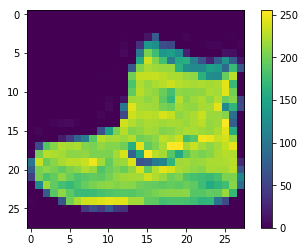

Ankle boot


In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
print(class_names[train_labels[0]])

In [11]:
print("Pixel max =", train_images[0].max())
print("Pixel min =", train_images[0].min())

Pixel max = 255
Pixel min = 0


28 x 28 image, with each pixel given a greyscale value between 0 and 255

This will need to be scaled to a value from 0 to 1, i.e. normalised

In [12]:
# Normalising pixel values from scale of 0-255 to scale of 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

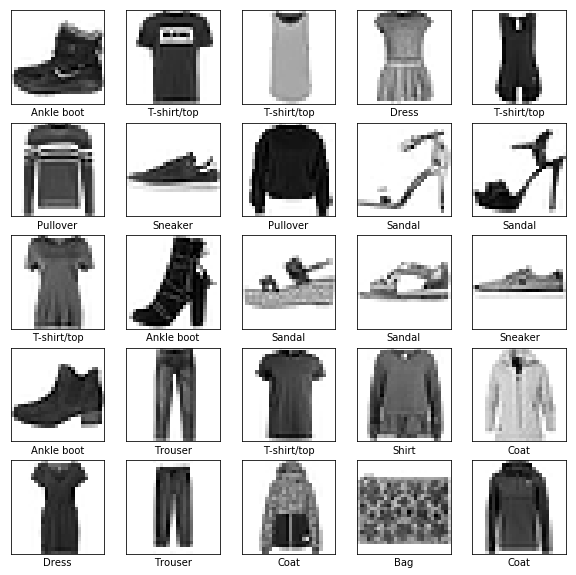

In [13]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])  # No x-axis ticks
    plt.yticks([])  # No y-axis ticks
    plt.grid(False)  # No grid
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
# Define the model's neural net structure
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flattens 28 x 28 array into single dim array
    keras.layers.Dense(128, activation="relu"),  # Densely connected layer, with 128 neurons
    keras.layers.Dense(10, activation="softmax")  # 10 nodes in output layer, correspondng to the 10 labels
])

In [15]:
# Model's training characteristics
model.compile(
    optimizer="adam",  # adam optimiser
    loss="sparse_categorical_crossentropy",  # loss function to minimise 
    metrics=["accuracy"]  # metric to target in training
)

In [16]:
model.fit(train_images, train_labels, epochs=5)  # 60 k training images with labels (supervised), through 5 epochs (iterations)

Epoch 1/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4961 - accuracy: 0.8259
Epoch 2/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3719 - accuracy: 0.8670
Epoch 3/5
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3351 - accuracy: 0.8779
Epoch 4/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3116 - accuracy: 0.8841
Epoch 5/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2924 - accuracy: 0.8918


In [17]:
# Evaluate the model on the test data set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy = ", test_acc)

10000/10000 [==============================] - 0s 20us/sample - loss: 0.3566 - accuracy: 0.8708
Test accuracy =  0.8708


In [18]:
# Predictions on the test dataset
predictions = model.predict(test_images)

In [19]:
predictions[0]

array([6.3814518e-06, 9.3426744e-10, 1.6720145e-07, 3.0737335e-09,
       6.7681825e-08, 5.4857507e-03, 1.1503051e-06, 3.5521216e-03,
       3.7835741e-07, 9.9095398e-01], dtype=float32)

In [20]:
pred_conf = predictions[0].max()
pred_conf

0.990954

In [21]:
pred_enum = np.argmax(predictions[0])
pred_enum

9

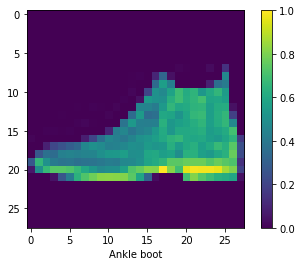

In [22]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[test_labels[0]])
plt.show()

In [23]:
print("Prediction for first test image is:", class_names[pred_enum], "at confidence of", pred_conf * 100, "per cent")
print("Actual label for first test image is:", class_names[test_labels[0]])

Prediction for first test image is: Ankle boot at confidence of 99.09539818763733 per cent
Actual label for first test image is: Ankle boot


In [24]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100 * np.max(predictions_array),
                                  class_names[true_label]),
                                  color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

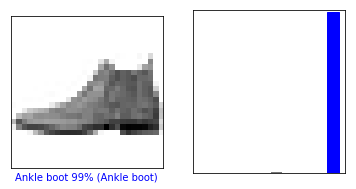

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

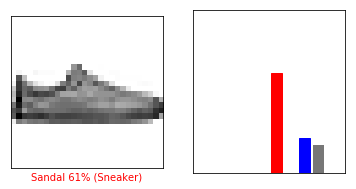

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

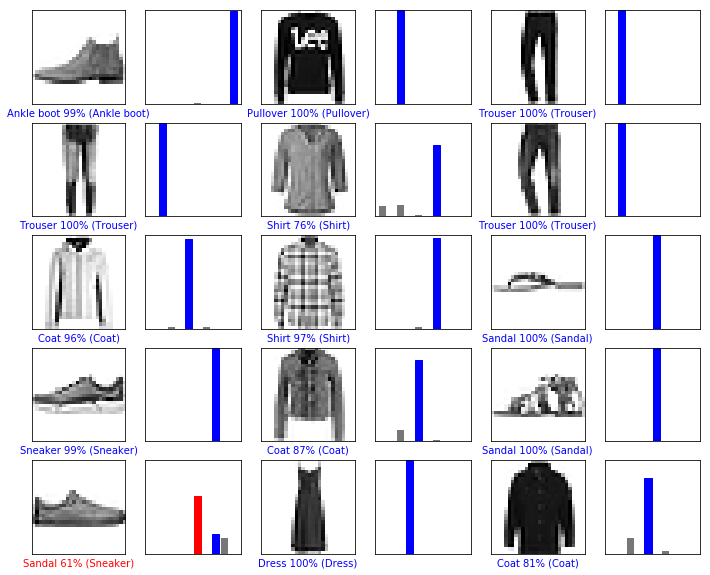

In [27]:
# Plot the first X test images, their predicted labels, and the true labels
# Color correct predictions in blue and incorrect predictions in red

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)

plt.show()

In [28]:
# Making prediction for a single image
# Using the first image from the test set
img = test_images[0]
print(img)
print(img.shape)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

`tf.keras` models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though we're using a single image, we need to add it to a list:

In [29]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [30]:
predictions_single = model.predict(img)
print(predictions_single)

[[6.3814459e-06 9.3426744e-10 1.6720129e-07 3.0737275e-09 6.7681952e-08
  5.4857563e-03 1.1503051e-06 3.5521216e-03 3.7835704e-07 9.9095398e-01]]


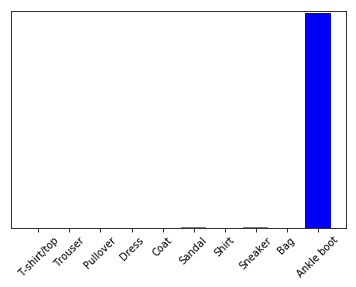

In [31]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)  # x-labels on plot are class names at 45deg rotation

`model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [32]:
np.argmax(predictions_single[0])

9

In [33]:
class_names[np.argmax(predictions_single[0])]

'Ankle boot'